In [345]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [346]:
df_train = pd.read_csv('titanic_train.csv')
df_train.head()
df_test = pd.read_csv('titanic_test.csv')
df_test.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"
2,2,0,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S,NaN,London
3,3,0,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN
4,2,0,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S,NaN,"Guernsey / Elizabeth, NJ"


데이터 확인

In [347]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [348]:
df_train.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,916.000000,916.000000,741.000000,916.000000,916.000000,916.000000,85.000000
mean,2.292576,0.385371,30.231444,0.532751,0.371179,32.532050,157.870588
std,0.842576,0.486949,13.934240,1.125957,0.837508,47.416524,98.257653
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,68.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,148.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,249.000000
max,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200,328.000000


In [349]:
df_train.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'body', 'home.dest'],
      dtype='object')

In [350]:
# 데이터 중 name ticket cabin body home.dest
df_train = df_train.drop(['name','ticket','cabin','body','home.dest'],axis=1)
df_test = df_test[['pclass','survived','sex','age','sibsp','parch','fare','embarked']]

In [351]:
df_test

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,male,38.0,0,0,7.8958,S
1,2,1,female,21.0,0,1,21.0000,S
2,2,0,male,42.0,1,0,27.0000,S
3,3,0,male,NaN,0,0,14.5000,S
4,2,0,male,25.0,0,0,31.5000,S
...,...,...,...,...,...,...,...,...
388,3,0,male,33.0,0,0,7.8542,S
389,2,1,female,31.0,0,0,21.0000,S
390,3,1,male,NaN,0,0,7.7500,Q
391,3,0,male,NaN,0,0,7.7500,Q


<Axes: xlabel='survived'>

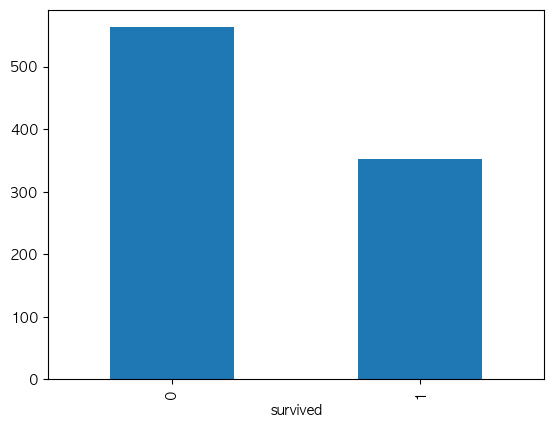

In [352]:
df_train['survived'].value_counts().plot.bar()

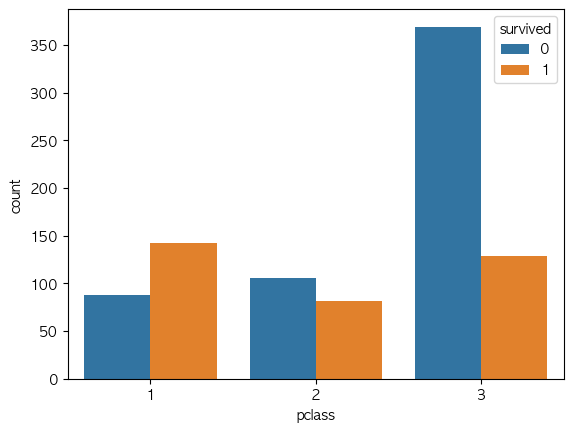

In [353]:
# 피처간의 관련성 부분을 확인
# 생존과 등급의 관계
# pclass : Passenger Class, 승객 등급
df_train['pclass'].value_counts()

# sns.countplot 승객등급별 생존 여부 2가지 컬럼을 가지고 그래프 비교
# pclass 의 분류로 survived 별 데이터 표시
ax = sns.countplot(x='pclass',hue='survived',data=df_train)

In [354]:
# 생존자의 pclass별 인원
df_train[df_train['survived']==1]['pclass'].value_counts()

pclass
1    142
3    129
2     82
Name: count, dtype: int64

In [355]:
df_train[df_train['survived']==0]['pclass'].value_counts()

pclass
3    369
2    106
1     88
Name: count, dtype: int64

In [356]:
# T-test
from scipy import stats

# 함수생성 - 데이터,컬럼이름
def valid_features(df,col_name): # df_train[df_train['age']>0], age - 741, age
    
    # 그래프 출력
    g = sns.FacetGrid(df,col='survived') # age 컬럼 데이터로 분류해서 survived 그래프 출력
    g.map(plt.hist,col_name,bins=30)
    # 히스토그램 그래프 출력 - x축이 age, y축은 생존자, 사망자 명
    
    # 생존자 데이터
    titanic_survived = df[df['survived']==1] # 생존자 데이터 306
    titanic_survived_static = np.array(titanic_survived[col_name]) # 생존자 데이터 중 나이 컬럼
    # 표준편차
    print('data std : ','%.2f'%np.std(titanic_survived_static)) # 생존자 데이터의 표준편차 출력
    
    # 사망자 데이터
    titanic_n_survived = df[df['survived']==0] # 사망자 데이터 435
    titanic_n_survived_static = np.array(titanic_n_survived[col_name]) # 사망자 데이터 중 나이 컬럼
    # 표준편차
    print('data std .: ','%.2f'%np.std(titanic_n_survived_static)) # 사망자 데이터의 표준편차 출력
    
    # --------------------
    # T-test로 두 집단의 평균 차이를 검정
    # T-test 0.05보다 작거나 큰 것을 가지고 판단
    tTestResult = stats.ttest_ind(titanic_survived[col_name],titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name],titanic_n_survived[col_name],equal_var=False)
    print("p-value assuming equal : %.30f and %.30f"%tTestResult)
    print("p-value not assuming equal : %.30f and %.30f"%tTestResultDiffVar)

In [357]:
# df_train[df_train['age']>0] # NaN은 제외
# d = df_train[df_train['age']>0]
# d[d['survived']==0]['age']

data std :  14.22
data std .:  13.71
p-value assuming equal : -0.546286603414587235150179367338 and 0.585033826648349020160821964964
p-value not assuming equal : -0.542789252645415110087867560651 and 0.587463475960641523521132967289


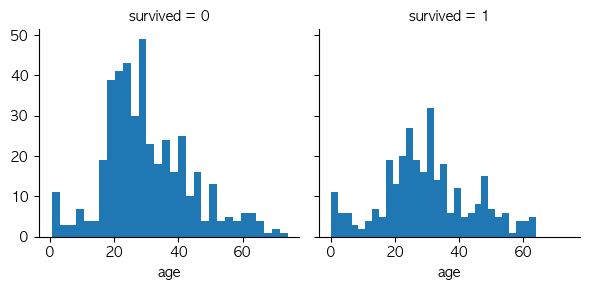

In [358]:
# 나이와 생존의 두 집단간의 관계 검정
# df_train[df_train['age']>0] - age 값이 들어 있는 전체 데이터, age 컬럼명
# 검정 기각 - 관련성이 없다. 0.05보다 높음 - 나이와 생존과는 관련성이 없다.
valid_features(df_train[df_train['age']>0],'age')


data std :  0.64
data std .:  1.34
p-value assuming equal : -2.118049962644114714294119039550 and 0.034440213547291605167277595001
p-value not assuming equal : -2.445876349454248810388889978640 and 0.014648148831542910641712040842


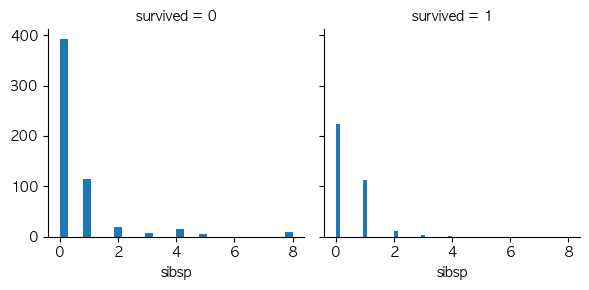

In [359]:
# sibsp 피처 : 탑승 한 형제 / 배우자 수
valid_features(df_train,'sibsp')

data std :  0.88
data std .:  0.75
p-value assuming equal : -9.848342545406843839828070485964 and 0.000000000000000000000811195331
p-value not assuming equal : -9.506570385571642134436842752621 and 0.000000000000000000035513742361


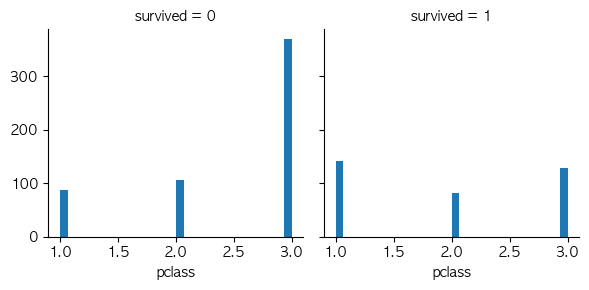

In [360]:
# 랜덤포레스트에서 영향력이 20%가 나와서 찍어봄
valid_features(df_train,'pclass')

데이터 확인

In [361]:
# 성별 확인
df_train['sex'].value_counts()

sex
male      581
female    335
Name: count, dtype: int64

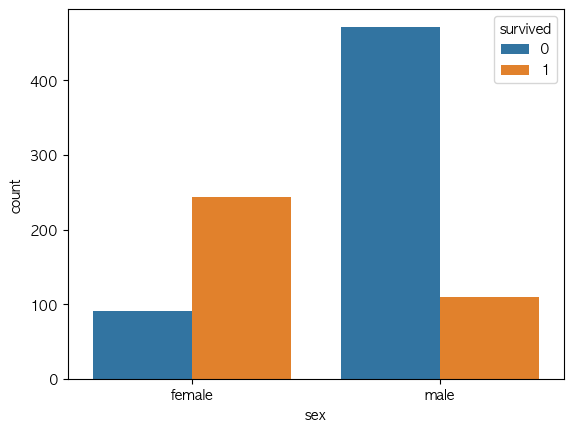

In [362]:
# 두 피처간의 분포 그래프 countsplot
ax = sns.countplot(x='sex',hue='survived',data=df_train)


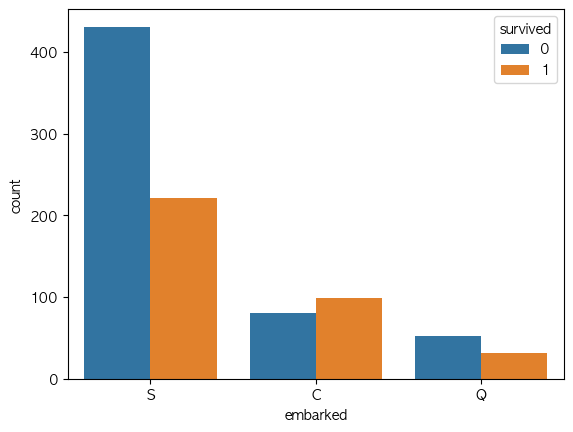

In [363]:
# embarked : 3개의 승선항
df_train['embarked'].value_counts()
ax = sns.countplot(x='embarked',hue='survived',data=df_train)

In [364]:
df_train.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

data std :  0.74
data std .:  0.89
p-value assuming equal : 1.864821081611072184358590675402 and 0.062526791752706867288935654869
p-value not assuming equal : 1.942039267279824787948427911033 and 0.052465520800355013031346373964


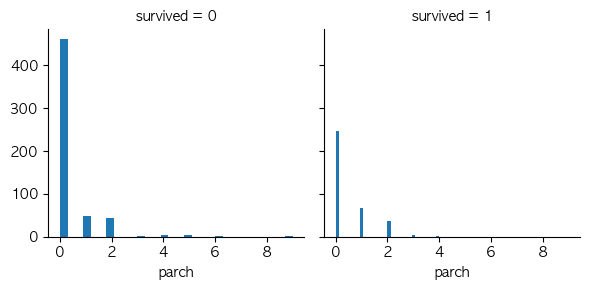

In [365]:
# parch : 탑승 한 부모 / 자녀 수
valid_features(df_train,'parch')

data std :  60.68
data std .:  33.65
p-value assuming equal : 7.522732050046647245267195103224 and 0.000000000000128198512138888708
p-value not assuming equal : 6.656868460601343961968723306200 and 0.000000000075249551879308182065


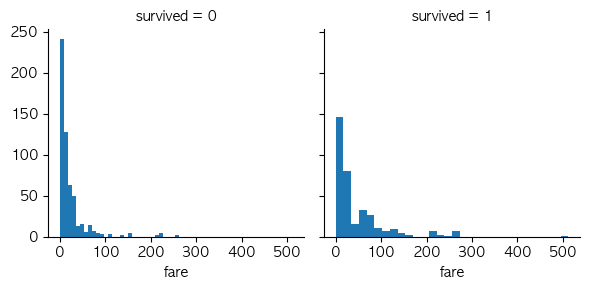

In [366]:
# fare : 승객 지불 요금
valid_features(df_train,'fare')

데이터 전처리

In [367]:
# age 데이터의 평균으로 결측치 처리
# nan 값을 제외한 age의 평균값

# 결측치에 넣을 평균값 - train,test 세트 모두 적용
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

# embark : 결측값 - 데이터 2개
# 데이터 중 가장 많이 나온 결과의 값을 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [368]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       916 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  916 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB


In [369]:
# train, test 세트 합치기
whole_df = pd.concat([df_train,df_test])

In [370]:
# 원한 인코딩 한 후 train,test 세트를 분리
train_idx_name = len(df_train)
train_idx_name

916

In [371]:
# 원핫 인코딩
whole_df_encoded = pd.get_dummies(whole_df)
whole_df_encoded.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,True,False,False,False,True
1,2,1,4.000000,1,1,23.0000,True,False,False,False,True
2,2,1,30.000000,1,0,13.8583,True,False,True,False,False
3,3,0,30.231444,0,0,7.7250,False,True,False,True,False
4,3,1,22.000000,0,0,7.7250,True,False,False,True,False


In [372]:
# train : 916
train_input = whole_df_encoded.iloc[:train_idx_name,whole_df_encoded.columns != 'survived']
train_target = whole_df_encoded['survived'][:train_idx_name]
# test : 393
test_input = whole_df_encoded.iloc[train_idx_name:,whole_df_encoded.columns != 'survived']
test_target = whole_df_encoded['survived'][train_idx_name:]

머신러닝

In [373]:
# 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [374]:
# 로지스틱회귀
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [375]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.787117903930131
0.7938931297709924


In [376]:
predict = lr.predict(test_scaled)

confusion_matrix

In [377]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=test_target,y_pred=predict)

In [378]:
confmat

array([[213,  33],
       [ 48,  99]])

In [379]:
# 경사하강법
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=10, random_state=42)
sc.fit(train_scaled,train_target)

/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [380]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7827510917030568
0.7964376590330788


In [381]:
classes = np.unique(train_target)

In [382]:
train_score = []
test_score = []
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

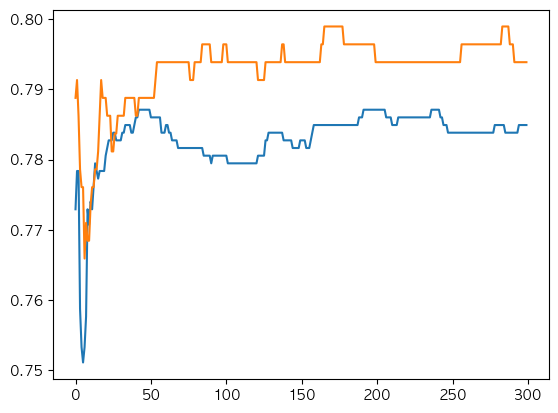

In [383]:
plt.plot(train_score)
plt.plot(test_score)

In [384]:
# 검증세트 - cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

splitter = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
score = cross_validate(lr,train_scaled,train_target,cv=splitter)

In [385]:
np.mean(score['test_score'])

0.7849259436215957

In [390]:
# 랜덤포레스트
rf = RandomForestClassifier(max_depth=3,n_jobs=-1,random_state=42)
scores = cross_validate(rf,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.8054033502560778 0.7969351389878832
